# T2-2
Resolva os exercícios abaixo utilizando a biblioteca Pandas e calcule os valores e as informações requeridas em cada item.

## Exercício 01

Um pesquisador deseja verificar se um instrumento para medir a concentração de determinada substância no sangue está bem calibrado. Para isto, ele tomou $15$ amostras de concentrações conhecidas (`X`) e determinou a respectiva concentração através do instrumento (`Y`), obtendo:

| | | | | | | | | | | | | | | | |
|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|-|
|`X`|2|2|2|4|4|4|6|6|6|8|8|8|10|10|10|
|`Y`|2.1|1.8|1.9|4.5|4.2|4|6.2|6|6.5|8.2|7.8|7.7|9.6|10|10.1|

Sobre as variáveis `X` e `Y`, responda:
- As variáveis estão fortemente ou fracamente correlacionadas? 
- A correlação é positiva ou negativa?
- Apresente o gráfico de dispersão das variáveis.


Fonte: Adaptado de (LACHOS, 2007).

In [ ]:
dfconcentracao = pd.DataFrame(
    {'x':
    {0:2,1:2,2:2,3:4,4:4,5:4,6:6,7:6,8:6,9:8,10:8,11:8,12:10,13:10,14:10}
     ,'y':
     {0:2.1,1:1.8,2:1.9,3:4.5,4:4.2,5:4,6:6.2,7:6,8:6.5,9:8.2,10:7.8,11:7.7,12:9.6,13:10,14:10.1}
})

dfconcentracao

,x,y
0,2,2.1
1,2,1.8
2,2,1.9
3,4,4.5
4,4,4.2
5,4,4.0
6,6,6.2
7,6,6.0
8,6,6.5
9,8,8.2


In [ ]:
SubsX = dfconcentracao['x']
SubsY = dfconcentracao['y']
r = SubsX.corr(SubsY)
print(r)


0.9960837948733587


Como o resultado está próximo de 1 e é maior que 0 podemos dizer que essas substancias são fortemente correlacionadas e que essa correlação é positiva(diretamente proporcional)

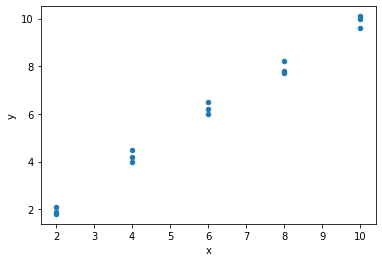

In [ ]:
dfconcentracao.plot.scatter('x','y')

Grafico dessa correlação que comprova o que foi dito acima

## Exercício 02
Carregue a base de dados `alugueis`, e reponda as questões a seguir.
```python
import pandas as pd
#No Colab:
from google.colab import drive
drive.mount('/drive')
alugueis = pd.read_csv('/drive/Shared drives/BasesPublicas/Exemplos/alugueis.csv', sep=',', encoding='latin1')
#No Jupyter:
# alugueis = pd.read_csv('alugueis.csv', sep=',', encoding='latin1')
alugueis.head()
```
Fonte da base: Adaptada de (JUNIOR, 2020).

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/drive')
alugueis = pd.read_csv('/drive/Shared drives/BasesPublicas/Bases/Exemplos/alugueis.csv', sep=',', encoding='utf-8')
alugueis.head()

Mounted at /drive


,Cidade,Area,Quartos,Banheiros,Vagas,Andar,Animais,Mobilia,Condominio,Aluguel,IPTU,Seguro Incendio,Total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,0,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,0,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,0,0,0,800,25,11,836


1. O que influencia mais o valor do aluguel? A área do imóvel ou o número de banheiros?
1. O que influencia mais no valor da taxa de condominio: o número de vagas de garagem ou o número de quartos? Essa correlação é significativa?
1. Qual variável está mais correlacionada com a área do imóvel: o número de vagas na garagem ou o número de banheiros?
1. Na base, podemos considerar que as casas possuem andar como '-'. Considere que os que os **registros que possuem valor para o andar são apartamentos**. Desta forma, responda:
    1. O valor aluguel é maior ou menor nos andares mais altos?
        1. Podemos dizer que isso acontece? A correlação é significativa?
        1. Faça o gráfico de dispersão, considerando número do andar e valor do aluguel.

In [ ]:
banheiros = alugueis['Banheiros']
area = alugueis['Area']
aluguel = alugueis['Aluguel']

r1 = area.corr(aluguel)

r2 = banheiros.corr(aluguel)

print(f'Correlação entre banheiros e aluguel:{r2}\nCorrelação entre area e aluguel:{r1} ')

Correlação entre banheiros e aluguel:0.6685043667013906
Correlação entre area e aluguel:0.18074233055311786 


O numero de banheiros influencia mais que a área do imóvel no valor do aluguel


In [ ]:
vagas = alugueis['Vagas']
quartos = alugueis['Quartos']
valCondominio = alugueis['Condominio']

r1 = vagas.corr(valCondominio)

r2 = quartos.corr(valCondominio)

print(f'Correlação entre a quantidade de quartos e valor do condominio:{r2}\nCorrelação entre vagas de estacionamento e valor do condominio:{r1} ')

Correlação entre a quantidade de quartos e valor do condominio:0.007138618515731225
Correlação entre vagas de estacionamento e valor do condominio:0.009321437212563004 


Entre essas duas correlações a da quantidade de vagas é mais significante que a da quantidade de quartos na influencia do valor do condominio, contudo, nenhuma dessas duas correlações tem um valor significativo para que sejam levadas em consideração tendo em vista que ambas são muito próximas de 0.

In [ ]:
r1 = vagas.corr(area)

r2 = banheiros.corr(area)

print(f'Correlação entre área do imóvel e quantidade de banheiros:{r2}\nCorrelação entre área do imóvel e quantidade de vagas:{r1} ')

Correlação entre área do imóvel e quantidade de banheiros:0.22676561953818103
Correlação entre área do imóvel e quantidade de vagas:0.19398335581394957 


A quantidade de banheiros tem um valor levemente maior, logo é a variavel mais correlacionada.

In [ ]:
andar = alugueis['Andar']
numAndar = []
for i in range(0,len(andar)):
  if andar[i] == '-':
    andar[i] = 0
  numAndar.append(int(andar[i]))

dfnumAndar = pd.Series(numAndar)
r = dfnumAndar.corr(aluguel)
print(r)


0.07359627920565286


Como podemos ver a relação entre o andar e o valor do aluguel é praticamente irrelevante

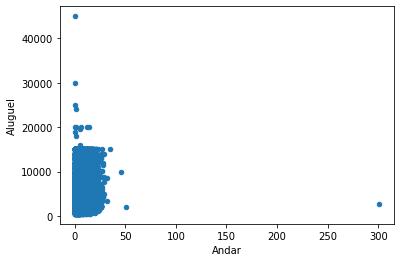

In [ ]:
alugueis.plot.scatter('Andar','Aluguel')


No grafico podemos ver que o apartamento no andar mais alto não é necessariamente o mais caro, sendo até consideravelmente barato em comparação aos outros

In [ ]:
dic = {'nome': "Pedro","idade": 17,"nota": 5.4}

for k,v in dic.items():
  print(f'{k} : {v}')

nome : Pedro
idade : 17
nota : 5.4


## Referências

[LACHOS, H. Estatística para experimentalistas: Notas de aula. Unicamp, 2007.](http://www.ime.unicamp.br/~hlachos/ME414_2007.html)  
[JUNIOR, R. *brazilian_houses_to_rent*. Kaggle, 2020](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent/metadata)  

